## Import Packages

In [1]:
import gensim
import numpy as np
import pandas as pd
import nltk
import multiprocessing 

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import csv
from gensim.models import Phrases

In [3]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;

In [4]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Data

In [27]:
#import data
df = pd.read_csv('/Users/maitreyimokashi/Documents/Thesis/Git_Repo/healthforum/Data/Tables/PostText.csv',header=None)
df.head()

0  \
0      F100 T726280 original   
1  F100 T726280 post_1157663   
2  F100 T726280 post_1158195   
3  F100 T726280 post_1158677   
4  F100 T726280 post_1158917   

                                                   1  
0   My donation has been made In honor of all the...  
1      I made my donation in honor of our beloved...  
2      Merry Christmas!  I am glad to run across ...  
3      Merry Christmas breast friends.  I will ma...  
4             This Post was deleted by yellowrose.

## Create New Column Names

In [28]:
df.columns = ['PostIDID','Post']

In [29]:
#split PostIDID to 3 new columns 
df[['ID', 'Post_ID', 'Post_No']] = pd.DataFrame([ x.split() for x in df['PostIDID'].tolist() ])

In [30]:
df.head()
df.tail()

PostIDID  \
4311641  F99 T867402 post_5283099   
4311642  F99 T867402 post_5283142   
4311643  F99 T867402 post_5283447   
4311644  F99 T867402 post_5283766   
4311645  F99 T867402 post_5284232   

                                                      Post   ID  Post_ID  \
4311641      Hang in there. I think we have to accept a...  F99  T867402   
4311642      I didn't think I needed to share with ever...  F99  T867402   
4311643      KayS, it sounds like you have close friend...  F99  T867402   
4311644      Pipandor,Thank you for sharing. I hope and...  F99  T867402   
4311645      Kay - I found a support group at church. T...  F99  T867402   

              Post_No  
4311641  post_5283099  
4311642  post_5283142  
4311643  post_5283447  
4311644  post_5283766  
4311645  post_5284232

In [37]:
#join ID and Post_ID to create new column PostID
df['PostID'] = df[['ID', 'Post_ID']].apply(lambda x: ' '.join(x), axis=1)

In [38]:
df.head()

PostIDID  \
0      F100 T726280 original   
1  F100 T726280 post_1157663   
2  F100 T726280 post_1158195   
3  F100 T726280 post_1158677   
4  F100 T726280 post_1158917   

                                                Post    ID  Post_ID  \
0   My donation has been made In honor of all the...  F100  T726280   
1      I made my donation in honor of our beloved...  F100  T726280   
2      Merry Christmas!  I am glad to run across ...  F100  T726280   
3      Merry Christmas breast friends.  I will ma...  F100  T726280   
4             This Post was deleted by yellowrose.    F100  T726280   

        Post_No        PostID  
0      original  F100 T726280  
1  post_1157663  F100 T726280  
2  post_1158195  F100 T726280  
3  post_1158677  F100 T726280  
4  post_1158917  F100 T726280

In [ ]:
df_post = pd.read_csv('/Users/maitreyimokashi/Documents/Thesis/Git_Repo/healthforum/Data/Tables/Post.csv',header=None)

In [42]:
df_post = post.sample(n=20000)

In [44]:
df_post.head()

Post
2222960      I heard that pot does help with nausea. No...
1283343      Happy anniversary, Jo, and Happy 4th every...
2010881      Marg~   I think he is cute too, on most da...
2252443      Sally- I hope the prep and procedure go we...
2667947                                    which / witch

## Count the number of posts for F162, F44 and F5

In [7]:
from collections import Counter
forums = Counter(df['ID'])
forums

Counter({'F162': 54, 'F44': 300553, 'F5': 103585})

## Distribution of posts

In [8]:
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange']

fig = go.Figure(data=[go.Pie(labels=['Immunotherapy- Before During and After','Breast Reconstruction','Just Diagnosed'],
                             values=[54,300553,103585])])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

## Create a list of list of the words in the post column

In [45]:
#append data from RawText 
def read_data(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
data = []
for index, row in df_post.iterrows():
    data.append(read_data(row,"Post"))

In [46]:
data[:10]

[['heard',
  'that',
  'pot',
  'does',
  'help',
  'with',
  'nausea',
  'not',
  'sold',
  'on',
  'prevention',
  'there',
  'are',
  'ways',
  'to',
  'ingest',
  'without',
  'smoking',
  'friend',
  'of',
  'mine',
  'told',
  'me',
  'her',
  'boyfriend',
  'uses',
  'it',
  'for',
  'medical',
  'reasons',
  'and',
  'bought',
  'some',
  'contraption',
  'where',
  'he',
  'breaths',
  'fumes',
  'but',
  'not',
  'smoke',
  'not',
  'sure',
  'if',
  'it',
  'boiled',
  'or',
  'what',
  'seriously',
  'smoking',
  'unfiltered',
  'joint',
  'leaves',
  'you',
  'open',
  'to',
  'lung',
  'cancer',
  'doubt',
  'you',
  'want',
  'to',
  'battle',
  'that',
  'too',
  'not',
  'side',
  'effect',
  'would',
  'be',
  'interested',
  'in'],
 ['happy', 'anniversary', 'jo', 'and', 'happy', 'th', 'everyone'],
 ['marg',
  'think',
  'he',
  'is',
  'cute',
  'too',
  'on',
  'most',
  'days',
  'lolanna',
  'wow',
  'that',
  'is',
  'big',
  'cat',
  'don',
  'know',
  'what',
 

In [47]:
print("List of lists. Let's confirm: ", type(data), " of ", type(data[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


## Create a word2vec model for the words in the posts to find words used in similar context

In [48]:
#build the model
model = gensim.models.Word2Vec(size=200, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(data)

2020-03-08 11:59:12,600 : INFO : collecting all words and their counts
2020-03-08 11:59:12,603 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-03-08 11:59:12,741 : INFO : PROGRESS: at sentence #10000, processed 774413 words, keeping 30419 word types
2020-03-08 11:59:12,861 : INFO : collected 44092 word types from a corpus of 1554069 raw words and 20000 sentences
2020-03-08 11:59:12,862 : INFO : Loading a fresh vocabulary
2020-03-08 11:59:12,898 : INFO : effective_min_count=2 retains 22843 unique words (51% of original 44092, drops 21249)
2020-03-08 11:59:12,899 : INFO : effective_min_count=2 leaves 1532820 word corpus (98% of original 1554069, drops 21249)
2020-03-08 11:59:12,955 : INFO : deleting the raw counts dictionary of 44092 items
2020-03-08 11:59:12,956 : INFO : sample=0.001 downsamples 55 most-common words
2020-03-08 11:59:12,957 : INFO : downsampling leaves estimated 1180955 word corpus (77.0% of prior 1532820)
2020-03-08 11:59:13,018 : INFO : 

In [49]:
#train the model
model.train(sentences=data, total_examples=len(data), epochs=model.iter)

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  
2020-03-08 11:59:19,518 : INFO : training model with 10 workers on 22843 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negative=5 window=10
2020-03-08 11:59:20,537 : INFO : EPOCH 1 - PROGRESS: at 41.41% examples, 485959 words/s, in_qsize 19, out_qsize 0
2020-03-08 11:59:21,538 : INFO : EPOCH 1 - PROGRESS: at 89.00% examples, 523979 words/s, in_qsize 18, out_qsize 0
2020-03-08 11:59:21,685 : INFO : worker thread finished; awaiting finish of 9 more threads
2020-03-08 11:59:21,694 : INFO : worker thread finished; awaiting finish of 8 more threads
2020-03-08 11:59:21,745 : INFO : worker thread finished; awaiting finish of 7 more threads
2020-03-08 11:59:21,753 : INFO : worker thread finished; awaiting finish of 6 more threads
2020-03-08 11:59:21,774 : INFO : worker thread finished; a

(5904475, 7770345)

In [50]:
print(model.wv)

In [51]:
model.wv.save_word2vec_format('word2vec.emb')

2020-03-08 12:01:15,158 : INFO : storing 22843x200 projection weights into word2vec.emb


## Cluster words from the ontained embeddings

In [21]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

In [14]:
model.init_sims(replace = True)

2019-11-19 10:15:37,712 : INFO : precomputing L2-norms of word weight vectors


In [15]:
model_name = "BRCA Forum"
model.save(model_name)

2019-11-19 10:16:32,745 : INFO : saving Word2Vec object under BRCA Forum, separately None
2019-11-19 10:16:32,746 : INFO : storing np array 'vectors' to BRCA Forum.wv.vectors.npy
2019-11-19 10:16:32,949 : INFO : not storing attribute vectors_norm
2019-11-19 10:16:32,950 : INFO : storing np array 'syn1neg' to BRCA Forum.trainables.syn1neg.npy
2019-11-19 10:16:33,159 : INFO : not storing attribute cum_table
/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function

2019-11-19 10:16:33,296 : INFO : saved BRCA Forum


In [16]:
Z = model.wv.syn0

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).



In [17]:
print(Z[0].shape)

(200,)


In [18]:
Z[0]

array([-7.70274326e-02, -5.44479378e-02,  8.28063264e-02, -5.13951294e-02,
       -4.11586314e-02, -4.53714877e-02, -4.46411185e-02,  8.40225294e-02,
       -1.61675572e-01,  4.47624177e-02, -4.25083153e-02, -2.83345170e-02,
       -6.38443604e-02,  6.71271384e-02, -5.34948111e-02, -6.15526028e-02,
        1.45779755e-02, -1.56074343e-02, -4.44919094e-02, -5.98832853e-02,
       -1.75991595e-01, -2.36250553e-02, -1.83071452e-03,  7.05544129e-02,
        2.59348676e-02, -1.02706857e-01,  4.27980833e-02,  1.04998775e-01,
       -1.98929552e-02, -2.60487888e-02, -4.19526808e-02,  8.68476257e-02,
       -9.08837169e-02,  4.95142899e-02,  2.25312095e-02, -3.09177041e-02,
        2.19424032e-02, -1.19696505e-01, -7.18932673e-02,  7.58904070e-02,
        3.33567485e-02, -5.45805902e-04,  1.89665835e-02, -1.57219768e-01,
        1.41268680e-02,  7.71233952e-03, -4.93924394e-02, -2.72951685e-02,
        4.87167202e-02, -8.48469958e-02, -4.61816341e-02, -1.22876585e-01,
       -7.10457098e-03, -

In [24]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [26]:
centers, clusters = clustering_on_wordvecs(Z, 100);
centroid_map = dict(zip(model.wv.index2word, clusters));


In [68]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [ ]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
return df

In [58]:
top_words = get_top_words(model.wv.index2word, 50, centers, Z)

## Cluster

In [59]:
top_words

Cluster #01     Cluster #02     Cluster #03      Cluster #04  \
1            delts       randymich          iconic    marcellobawzy   
2        rhomboids       suggesion           kyoto      gottabefree   
3            flyes       paulamary         untimed          bennets   
4     strenthening    oneaglewings           schmo            dmktk   
5        kickbacks      thanksbela     bentonville           geegee   
6        repeative          typoon        finalist     juliechicago   
7        activates        luckjune   accompaniment             cpcf   
8      strengthing  prayersrebecca      paranormal         mallenne   
9       myofasical       latenight             raf          sohappy   
10      isometrics       yougbusse        crafters        sabrinayb   
11        contious            kuck           skits            varda   
12       virutally          naomib    pornographer          dianenc   
13         maching        maureens       mortenson         sroberts   
14          asanas           avtar         dezario         taderbug   
15           ligth       thankskay          youths           lilmis   
16      chaturanga      hellothank            gelt      nelliebelle   
17    powerlifting     edtherapist         wasilla            lilij   
18        modifies         sunnyca        pakistan           liliyj   
19  ellipticalling            jeul           sacds          mbticsw   
20        streches      carlydrama     personified  warriorprincess   
21   strenghtening          jacque        westenra     everyonegood   
22        deltoids      lemonjello      temperment      joniseattle   
23       theraband    helloooooooo            pisa         firegirl   
24      repetative        mprinoak      oregonians   barbaheffernan   
25      quadriceps        exbrngrl         haughty  eternaloptimism   
26        postural         zomatti         lorries          susanne   
27       stregthen    pinkbutterly      honourable         gwennymd   
28       ellipical         jbaudit        armenian         katesmom   
29         muscled          pattiw      headlining         latigger   
30      therabands      encoraging         tearoom          margiec   
31         gazelle     encourgaing         keillor             anym   
32      kettlebell           hanan       ukrainian   fightlikeagirl   
33        adductor            linp        gamblers           husker   
34     chatarungas    laurawarrior        roessner     irishcolleen   
35       headstand        lucklisa      undefeated       kifinnigan   
36      handstands       hithought        alaskans          sharifa   
37        planking      ladieshugs      geological           bethcw   
38       deadlifts             hhm           mural      judgejaclyn   
39   weightbearing           kimme          wilkes      jerseymomof   
40         activty       herekaren        theather          polamom   
41          forarm       ebeenezer          tribes           kkmich   
42        postures         citygal       amestrdam         fujimama   
43   subscapularis       sheilayou        militias              djb   
44         cricked           psjan       episcopal   gointocarolina   
45           yogis      therethere  anthropologist          mistral   
46      strenghten        tayhante          masala         christic   
47       exercices            sueo       grandiose         mommytms   
48        misalign          artcle         mitchel         tinahoff   
49          spinae         swoosie           taima        omahagirl   
50         kickbox       fourtangs      exhibitors   thisdayforward   

        Cluster #05      Cluster #06    Cluster #07   Cluster #08  \
1       megoblastic    policyholders       sequined      lubiderm   
2        vasculitis      legislative          jcrew       cmnsidd   
3       spondylosis              hhs          lapel         gluey   
4    deconditioning        certifies      streamers        reuses   
5            uteral        govenment    

## Create a wordcloud to visualize words used in same context

In [60]:
def display_cloud(cluster_num, cmap):
    wc = WordCloud(background_color="black", max_words=2000, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num).zfill(2)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

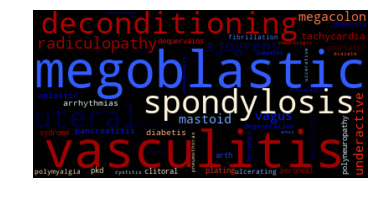

In [61]:
cmaps = cycle(['flag'])
for i in range(10):
    col = next(cmaps);
    display_cloud(5, col)

In [ ]:
, 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'

## MOST - SIMILAR & TSNE

In [64]:
#check the words
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

immuno
oncology
io
and
immunotherapy
drugs
are
humanity
best
shot


In [67]:
len(word_vectors.vocab)

79574

In [39]:
#total length of distinct words
len(word_vectors.vocab)

79574

In [40]:
#vector of the word
model.wv["breast"]

array([-1.46439418e-01, -2.43373271e-02,  3.19811136e-01, -1.63542762e-01,
        1.39980122e-01, -3.00076813e-01, -7.88096040e-02, -1.54062524e-01,
        2.04087228e-01, -1.71001226e-01, -3.51312041e-01, -2.16326833e-01,
       -2.50298232e-01,  7.24036247e-02, -3.09182405e-01,  3.64612266e-02,
        2.66584992e-01,  2.14401372e-02, -1.30088612e-01, -7.70797506e-02,
        6.30706269e-03,  5.89484647e-02,  2.00254798e-01,  2.18309890e-02,
       -1.00674629e-01, -3.94923203e-02,  4.40743938e-02,  2.01869041e-01,
        2.58746576e-02,  3.10300887e-01, -1.72550812e-01,  3.06614161e-01,
       -3.00463885e-01,  1.99559554e-01, -1.02028280e-01, -7.37236440e-02,
       -1.09926499e-01, -4.27077770e-01, -1.33754060e-01,  2.34935194e-01,
        1.98118657e-01,  3.63830358e-01,  2.36557215e-01,  4.22699273e-01,
       -1.67735010e-01, -1.72128677e-01, -9.18340161e-02, -8.18203464e-02,
        7.81036019e-02,  1.32935569e-01, -4.60005663e-02, -1.16352849e-01,
        1.39978426e-02, -

In [41]:
#select top 250 words to plot the TSNE plot 
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<250:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'accelerate': <gensim.models.keyedvectors.Vocab at 0x1a1d137c18>,
 'all': <gensim.models.keyedvectors.Vocab at 0x1a1d1374e0>,
 'also': <gensim.models.keyedvectors.Vocab at 0x1a1d137fd0>,
 'although': <gensim.models.keyedvectors.Vocab at 0x1a1d139f28>,
 'an': <gensim.models.keyedvectors.Vocab at 0x1a1d1379b0>,
 'and': <gensim.models.keyedvectors.Vocab at 0x1a1cf77438>,
 'answer': <gensim.models.keyedvectors.Vocab at 0x1a1d139630>,
 'antibodies': <gensim.models.keyedvectors.Vocab at 0x1a1d139ac8>,
 'antiquated': <gensim.models.keyedvectors.Vocab at 0x1a1d13b5c0>,
 'approach': <gensim.models.keyedvectors.Vocab at 0x1ab5160860>,
 'are': <gensim.models.keyedvectors.Vocab at 0x1a1cf77390>,
 'articles': <gensim.models.keyedvectors.Vocab at 0x1ab5160940>,
 'as': <gensim.models.keyedvectors.Vocab at 0x1ab51609e8>,
 'asked': <gensim.models.keyedvectors.Vocab at 0x1a1d139518>,
 'at': <gensim.models.keyedvectors.Vocab at 0x1a1cf7b828>,
 'based': <gensim.models.keyedvectors.Vocab at 0x1a1d139ef0>,

In [42]:
#check for top similarity 
w1 = "idc"
model.wv.most_similar(positive=w1, topn=5)

2019-11-09 21:36:02,372 : INFO : precomputing L2-norms of word weight vectors


[('dcis', 0.840488076210022),
 ('ilc', 0.8150081634521484),
 ('lobular', 0.7522732019424438),
 ('microinvasion', 0.7458490133285522),
 ('ductal', 0.7360737323760986)]

In [48]:
#check for top similarity 
w11 = "leukemia"
model.wv.most_similar(positive=w11, topn=5)

[('glioblastoma', 0.7406290173530579),
 ('aml', 0.7165719270706177),
 ('congestive', 0.7077635526657104),
 ('hodgkin', 0.6962602138519287),
 ('hodgekins', 0.6925734281539917)]

In [46]:
#check for top similarity 
w111 = "immunotherapy"
model.wv.most_similar(positive=w111, topn=5)

[('opdivo', 0.7946169376373291),
 ('kadcyla', 0.7885205745697021),
 ('pembrolizumab', 0.7775823473930359),
 ('keytruda', 0.774895191192627),
 ('immunotherapies', 0.7720902562141418)]

In [49]:
#check for top similarity 
w1111 = "monoclonal"
model.wv.most_similar(positive=w1111, topn=5)

[('keytruda', 0.8852413892745972),
 ('antibody', 0.8778364658355713),
 ('pembrolizumab', 0.8704416751861572),
 ('opdivo', 0.8655616641044617),
 ('pertuzumab', 0.8509886264801025)]

In [45]:
w2 = ["breast", "cancer"]
model.wv.most_similar(positive=w2, topn=5)

[('bc', 0.7741782665252686),
 ('caner', 0.6927129030227661),
 ('metasticized', 0.6832720041275024),
 ('that', 0.6787495613098145),
 ('cancers', 0.6743150353431702)]

In [57]:
#import package for TSNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [63]:
#TSNE model
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=1000, random_state=23)
Y = tsne_model.fit_transform(X)

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



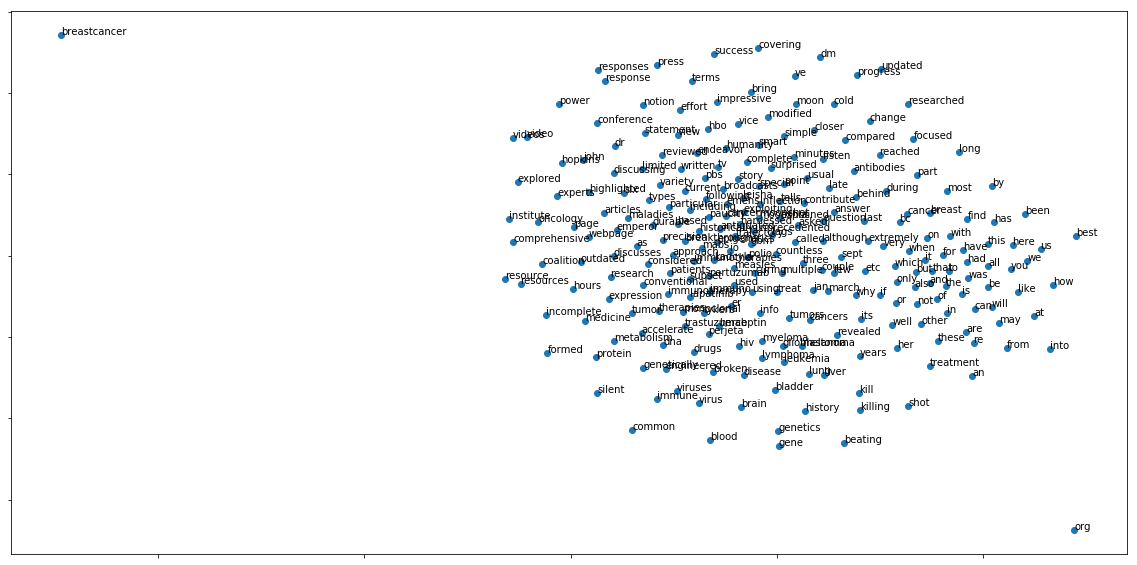

In [64]:
#Plot the t-SNE graph
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

In [65]:
#stopwords
stop = {'‚','little','hii','hi','too','may','then','it','etc','has','only','do','ha','been','not','here','there','also','an','the','have','had','just','still','is','am','are','was','were','so','to','have','wo','ca','be','since','might','at','those','while','across','though','should','us','than','and','any','all','after','by','as','from','since','If','at','am','be','of','out','about','in','but','will','would','the','I','until','these','can','this','from','with','by','for','if','on','like','that','of','I','it','me','some','a','that','could','or','And','that'}

In [66]:
#remove all stopwords
new_words = [] 
  
for w in wanted_words: 
    if w not in stop: 
        new_words.append(w) 
print(new_words) 

['immuno', 'oncology', 'io', 'immunotherapy', 'drugs', 'humanity', 'best', 'shot', 'beating', 'cancer', 'during', 'last', 'few', 'years', 'revealed', 'impressive', 'durable', 'responses', 'variety', 'tumor', 'types', 'which', 'conventional', 'therapies', 'historically', 'limited', 'success', 'melanoma', 'leukemia', 'lymphoma', 'lung', 'liver', 'bladder', 'power', 'approach', 'highlighted', 'countless', 'articles', 'well', 'tv', 'broadcasts', 'including', 'hbo', 'vice', 'special', 'killing', 'explored', 'subset', 'called', 'how', 'following', 'three', 'common', 'viruses', 'genetically', 'modified', 'find', 'kill', 're', 'engineered', 'measles', 'virus', 'used', 'treat', 'patients', 'multiple', 'myeloma', 'cold', 'glioblastoma', 'gbm', 'brain', 'tumors', 'hiv', 'blood', 'minutes', 'focused', 'curing', 'using', 'polio', 'pbs', 'emperor', 'maladies', 'tells', 'complete', 'story', 'its', 'history', 'current', 'breakthroughs', 'six', 'hours', 'long', 'broken', 'into', 'videos', 'part', 'cove

## COSINE SIMILARITY

In [67]:
#find cosine similarity for all word-pairs
similarity = []
words = []
keys = []
count = 0
for i in range(len(new_words)):
    for j in range(i + 1, len(new_words)):
        for i in new_words:
            if i in word_vectors.vocab:
                for j in new_words:
                    if j in word_vectors:
                        if count < 44521:
                            sims = model.similarity(i, j)
                            print("The cosine similarity between : {} - {} : {}".format(i, j, sims))
                            similarity.append(sims)
                            words.append(i)
                            keys.append(j)
                            count +=1 
                        else:
                            break
                    else:
                        break
            else:
                break
            

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning:

Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).



The cosine similarity between : immuno - immuno : 0.0
The cosine similarity between : immuno - oncology : 0.0
The cosine similarity between : immuno - io : -3.6893488147419103e+19
The cosine similarity between : immuno - immunotherapy : -3.6893488147419103e+19
The cosine similarity between : immuno - drugs : -2.0
The cosine similarity between : immuno - humanity : -2.0
The cosine similarity between : immuno - best : 0.0
The cosine similarity between : immuno - shot : 0.0
The cosine similarity between : immuno - beating : 1.0842021724855044e-19
The cosine similarity between : immuno - cancer : -2.0
The cosine similarity between : immuno - during : 0.0
The cosine similarity between : immuno - last : -3.6893488147419103e+19
The cosine similarity between : immuno - few : -1.0842021724855044e-19
The cosine similarity between : immuno - years : -2.0
The cosine similarity between : immuno - revealed : -2.0
The cosine similarity between : immuno - impressive : -3.6893488147419103e+19
The cosin

The cosine similarity between : best - expression : 0.0
The cosine similarity between : best - protein : 0.0
The cosine similarity between : best - metabolism : 0.0
The cosine similarity between : best - couple : -2.0
The cosine similarity between : best - video : 0.0
The cosine similarity between : best - discussing : 0.0
The cosine similarity between : best - effort : -3.6893488147419103e+19
The cosine similarity between : best - moonshot : 3.6893488147419103e+19
The cosine similarity between : best - explained : -3.6893488147419103e+19
The cosine similarity between : best - very : 0.0
The cosine similarity between : best - simple : 0.0
The cosine similarity between : best - terms : 0.0
The cosine similarity between : best - press : -2.0
The cosine similarity between : best - conference : -2.0
The cosine similarity between : best - jan : 0.0
The cosine similarity between : best - listen : 0.0
The cosine similarity between : best - experts : 2.0
The cosine similarity between : best - 

The cosine similarity between : few - history : 0.0
The cosine similarity between : few - current : 0.0
The cosine similarity between : few - breakthroughs : -1.0842021724855044e-19
The cosine similarity between : few - six : -1.0842021724855044e-19
The cosine similarity between : few - hours : -2.0
The cosine similarity between : few - long : -2.0
The cosine similarity between : few - broken : -2.0
The cosine similarity between : few - into : 2.0
The cosine similarity between : few - videos : 0.0
The cosine similarity between : few - part : -2.0
The cosine similarity between : few - covering : 0.0
The cosine similarity between : few - we : -3.6893488147419103e+19
The cosine similarity between : few - ve : 0.0
The cosine similarity between : few - reached : -2.0
The cosine similarity between : few - inflection : 2.0
The cosine similarity between : few - point : -1.0842021724855044e-19
The cosine similarity between : few - change : -2.0
The cosine similarity between : few - trajectory :

The cosine similarity between : responses - breast : 3.6893488147419103e+19
The cosine similarity between : responses - treatment : -3.6893488147419103e+19
The cosine similarity between : responses - late : 0.0
The cosine similarity between : responses - unprecedented : 2.0
The cosine similarity between : responses - coalition : 3.6893488147419103e+19
The cosine similarity between : responses - formed : -2.0
The cosine similarity between : responses - accelerate : -2.0
The cosine similarity between : responses - progress : 0.0
The cosine similarity between : responses - moon : 2.0
The cosine similarity between : responses - cancermoonshot : -2.0
The cosine similarity between : responses - endeavor : 0.0
The cosine similarity between : responses - bring : 0.0
The cosine similarity between : responses - closer : -2.0
The cosine similarity between : responses - immunotherapies : -2.0
The cosine similarity between : responses - precision : 2.0
The cosine similarity between : responses - me

The cosine similarity between : therapies - articles : 0.0
The cosine similarity between : therapies - well : 0.0
The cosine similarity between : therapies - tv : -3.6893488147419103e+19
The cosine similarity between : therapies - broadcasts : 2.0
The cosine similarity between : therapies - including : -3.6893488147419103e+19
The cosine similarity between : therapies - hbo : 0.0
The cosine similarity between : therapies - vice : -3.6893488147419103e+19
The cosine similarity between : therapies - special : 0.0
The cosine similarity between : therapies - killing : 2.0
The cosine similarity between : therapies - explored : -3.6893488147419103e+19
The cosine similarity between : therapies - subset : 1.0842021724855044e-19
The cosine similarity between : therapies - called : 0.0
The cosine similarity between : therapies - how : 0.0
The cosine similarity between : therapies - following : -2.0
The cosine similarity between : therapies - three : 0.0
The cosine similarity between : therapies - 

The cosine similarity between : lymphoma - outdated : 0.0
The cosine similarity between : lymphoma - extremely : -2.0
The cosine similarity between : lymphoma - incomplete : 0.0
The cosine similarity between : lymphoma - discusses : 0.0
The cosine similarity between : lymphoma - monoclonal : 2.0
The cosine similarity between : lymphoma - antibodies : 0.0
The cosine similarity between : lymphoma - mabs : 2.0
The cosine similarity between : lymphoma - her : -3.6893488147419103e+19
The cosine similarity between : lymphoma - herceptin : 0.0
The cosine similarity between : lymphoma - trastuzumab : 0.0
The cosine similarity between : lymphoma - tykerb : 1.0842021724855044e-19
The cosine similarity between : lymphoma - lapatinib : 0.0
The cosine similarity between : lymphoma - perjeta : 0.0
The cosine similarity between : lymphoma - pertuzumab : -2.0
The cosine similarity between : lymphoma - kadcyla : 2.0
The cosine similarity between : lymphoma - dm : -2.0
The cosine similarity between : ly

The cosine similarity between : highlighted - leukemia : 0.0
The cosine similarity between : highlighted - lymphoma : 0.0
The cosine similarity between : highlighted - lung : 1.0842021724855044e-19
The cosine similarity between : highlighted - liver : -2.0
The cosine similarity between : highlighted - bladder : 0.0
The cosine similarity between : highlighted - power : 0.0
The cosine similarity between : highlighted - approach : -2.0
The cosine similarity between : highlighted - highlighted : 0.0
The cosine similarity between : highlighted - countless : 0.0
The cosine similarity between : highlighted - articles : 3.6893488147419103e+19
The cosine similarity between : highlighted - well : -2.0
The cosine similarity between : highlighted - tv : 2.0
The cosine similarity between : highlighted - broadcasts : 2.0
The cosine similarity between : highlighted - including : -1.0842021724855044e-19
The cosine similarity between : highlighted - hbo : 0.0
The cosine similarity between : highlighted

The cosine similarity between : including - story : 3.6893488147419103e+19
The cosine similarity between : including - its : 2.0
The cosine similarity between : including - history : 3.6893488147419103e+19
The cosine similarity between : including - current : 0.0
The cosine similarity between : including - breakthroughs : -2.0
The cosine similarity between : including - six : -1.0842021724855044e-19
The cosine similarity between : including - hours : -3.6893488147419103e+19
The cosine similarity between : including - long : 2.0
The cosine similarity between : including - broken : 0.0
The cosine similarity between : including - into : 1.0842021724855044e-19
The cosine similarity between : including - videos : -3.6893488147419103e+19
The cosine similarity between : including - part : -3.6893488147419103e+19
The cosine similarity between : including - covering : 2.0
The cosine similarity between : including - we : -3.6893488147419103e+19
The cosine similarity between : including - ve : -2

The cosine similarity between : subset - responses : 0.0
The cosine similarity between : subset - variety : 0.0
The cosine similarity between : subset - tumor : -2.0
The cosine similarity between : subset - types : 2.0
The cosine similarity between : subset - which : 0.0
The cosine similarity between : subset - conventional : 3.6893488147419103e+19
The cosine similarity between : subset - therapies : 1.0842021724855044e-19
The cosine similarity between : subset - historically : -2.0
The cosine similarity between : subset - limited : -2.0
The cosine similarity between : subset - success : 2.0
The cosine similarity between : subset - melanoma : 0.0
The cosine similarity between : subset - leukemia : 3.6893488147419103e+19
The cosine similarity between : subset - lymphoma : -2.0
The cosine similarity between : subset - lung : 0.0
The cosine similarity between : subset - liver : 2.0
The cosine similarity between : subset - bladder : 0.0
The cosine similarity between : subset - power : -3.6

The cosine similarity between : common - video : 2.0
The cosine similarity between : common - discussing : -2.0
The cosine similarity between : common - effort : -1.0842021724855044e-19
The cosine similarity between : common - moonshot : -2.0
The cosine similarity between : common - explained : 0.0
The cosine similarity between : common - very : 2.0
The cosine similarity between : common - simple : 0.0
The cosine similarity between : common - terms : -2.0
The cosine similarity between : common - press : 3.6893488147419103e+19
The cosine similarity between : common - conference : 2.0
The cosine similarity between : common - jan : -2.0
The cosine similarity between : common - listen : 3.6893488147419103e+19
The cosine similarity between : common - experts : -1.0842021724855044e-19
The cosine similarity between : common - you : -3.6893488147419103e+19
The cosine similarity between : common - smart : 0.0
The cosine similarity between : common - asked : 0.0
The cosine similarity between : c

The cosine similarity between : engineered - myeloma : -2.0
The cosine similarity between : engineered - cold : 0.0
The cosine similarity between : engineered - glioblastoma : 0.0
The cosine similarity between : engineered - gbm : 0.0
The cosine similarity between : engineered - brain : -3.6893488147419103e+19
The cosine similarity between : engineered - tumors : 0.0
The cosine similarity between : engineered - hiv : 2.0
The cosine similarity between : engineered - blood : 2.0
The cosine similarity between : engineered - minutes : 0.0
The cosine similarity between : engineered - focused : 2.0
The cosine similarity between : engineered - curing : -2.0
The cosine similarity between : engineered - using : 0.0
The cosine similarity between : engineered - polio : -3.6893488147419103e+19
The cosine similarity between : engineered - pbs : 0.0
The cosine similarity between : engineered - emperor : -1.0842021724855044e-19
The cosine similarity between : engineered - maladies : 2.0
The cosine si

The cosine similarity between : multiple - lapatinib : -1.0842021724855044e-19
The cosine similarity between : multiple - perjeta : -2.0
The cosine similarity between : multiple - pertuzumab : 3.6893488147419103e+19
The cosine similarity between : multiple - kadcyla : -2.0
The cosine similarity between : multiple - dm : -3.6893488147419103e+19
The cosine similarity between : multiple - research : 2.0
The cosine similarity between : multiple - institute : -2.0
The cosine similarity between : multiple - webpage : 2.0
The cosine similarity between : multiple - most : 2.0
The cosine similarity between : multiple - comprehensive : 3.6893488147419103e+19
The cosine similarity between : multiple - resource : 2.0
The cosine similarity between : multiple - based : 0.0
The cosine similarity between : multiple - although : 2.0
The cosine similarity between : multiple - updated : -1.0842021724855044e-19
The cosine similarity between : multiple - sept : -2.0
The cosine similarity between : multiple

The cosine similarity between : hiv - special : 0.0
The cosine similarity between : hiv - killing : 0.0
The cosine similarity between : hiv - explored : 2.0
The cosine similarity between : hiv - subset : -1.0842021724855044e-19
The cosine similarity between : hiv - called : 0.0
The cosine similarity between : hiv - how : -1.0842021724855044e-19
The cosine similarity between : hiv - following : 0.0
The cosine similarity between : hiv - three : 0.0
The cosine similarity between : hiv - common : 0.0
The cosine similarity between : hiv - viruses : -2.0
The cosine similarity between : hiv - genetically : -3.6893488147419103e+19
The cosine similarity between : hiv - modified : 0.0
The cosine similarity between : hiv - find : -2.0
The cosine similarity between : hiv - kill : 1.0842021724855044e-19
The cosine similarity between : hiv - re : 3.6893488147419103e+19
The cosine similarity between : hiv - engineered : 2.0
The cosine similarity between : hiv - measles : 2.0
The cosine similarity bet

The cosine similarity between : using - conference : -3.6893488147419103e+19
The cosine similarity between : using - jan : 0.0
The cosine similarity between : using - listen : -1.0842021724855044e-19
The cosine similarity between : using - experts : 0.0
The cosine similarity between : using - you : 0.0
The cosine similarity between : using - smart : 2.0
The cosine similarity between : using - asked : 0.0
The cosine similarity between : using - question : 1.0842021724855044e-19
The cosine similarity between : using - harnessed : 0.0
The cosine similarity between : using - answer : 0.0
The cosine similarity between : using - researched : 0.0
The cosine similarity between : using - usual : 0.0
The cosine similarity between : using - resources : 0.0
The cosine similarity between : using - surprised : 1.0842021724855044e-19
The cosine similarity between : using - paucity : 2.0
The cosine similarity between : using - info : 0.0
The cosine similarity between : using - breastcancer : 0.0
The c

The cosine similarity between : complete - moon : 0.0
The cosine similarity between : complete - cancermoonshot : 1.0842021724855044e-19
The cosine similarity between : complete - endeavor : 0.0
The cosine similarity between : complete - bring : 0.0
The cosine similarity between : complete - closer : 0.0
The cosine similarity between : complete - immunotherapies : -3.6893488147419103e+19
The cosine similarity between : complete - precision : 0.0
The cosine similarity between : complete - medicine : -2.0
The cosine similarity between : complete - exploiting : 2.0
The cosine similarity between : complete - genetics : -1.0842021724855044e-19
The cosine similarity between : complete - dna : 0.0
The cosine similarity between : complete - epigenetics : 2.0
The cosine similarity between : complete - gene : -2.0
The cosine similarity between : complete - expression : 0.0
The cosine similarity between : complete - protein : 3.6893488147419103e+19
The cosine similarity between : complete - metab

The cosine similarity between : six - treatment : 2.0
The cosine similarity between : six - late : -2.0
The cosine similarity between : six - unprecedented : 2.0
The cosine similarity between : six - coalition : -1.0842021724855044e-19
The cosine similarity between : six - formed : 0.0
The cosine similarity between : six - accelerate : 0.0
The cosine similarity between : six - progress : 0.0
The cosine similarity between : six - moon : 2.0
The cosine similarity between : six - cancermoonshot : 2.0
The cosine similarity between : six - endeavor : 0.0
The cosine similarity between : six - bring : 1.0842021724855044e-19
The cosine similarity between : six - closer : 2.0
The cosine similarity between : six - immunotherapies : 0.0
The cosine similarity between : six - precision : 2.0
The cosine similarity between : six - medicine : -2.0
The cosine similarity between : six - exploiting : -2.0
The cosine similarity between : six - genetics : -2.0
The cosine similarity between : six - dna : 0.

The cosine similarity between : part - covering : 1.0842021724855044e-19
The cosine similarity between : part - we : 0.0
The cosine similarity between : part - ve : 0.0
The cosine similarity between : part - reached : 0.0
The cosine similarity between : part - inflection : -2.0
The cosine similarity between : part - point : 0.0
The cosine similarity between : part - change : 0.0
The cosine similarity between : part - trajectory : 2.0
The cosine similarity between : part - breast : -3.6893488147419103e+19
The cosine similarity between : part - treatment : 2.0
The cosine similarity between : part - late : 2.0
The cosine similarity between : part - unprecedented : 0.0
The cosine similarity between : part - coalition : 2.0
The cosine similarity between : part - formed : 1.0842021724855044e-19
The cosine similarity between : part - accelerate : -2.0
The cosine similarity between : part - progress : 1.0842021724855044e-19
The cosine similarity between : part - moon : -2.0
The cosine similari

The cosine similarity between : point - best : 1.0842021724855044e-19
The cosine similarity between : point - shot : 1.0842021724855044e-19
The cosine similarity between : point - beating : 0.0
The cosine similarity between : point - cancer : 0.0
The cosine similarity between : point - during : 0.0
The cosine similarity between : point - last : 0.0
The cosine similarity between : point - few : -1.0842021724855044e-19
The cosine similarity between : point - years : 0.0
The cosine similarity between : point - revealed : 0.0
The cosine similarity between : point - impressive : -2.0
The cosine similarity between : point - durable : 0.0
The cosine similarity between : point - responses : 0.0
The cosine similarity between : point - variety : 3.6893488147419103e+19
The cosine similarity between : point - tumor : 2.0
The cosine similarity between : point - types : 0.0
The cosine similarity between : point - which : 1.0842021724855044e-19
The cosine similarity between : point - conventional : 3

The cosine similarity between : unprecedented - types : 3.6893488147419103e+19
The cosine similarity between : unprecedented - which : -2.0
The cosine similarity between : unprecedented - conventional : -3.6893488147419103e+19
The cosine similarity between : unprecedented - therapies : -1.0842021724855044e-19
The cosine similarity between : unprecedented - historically : 0.0
The cosine similarity between : unprecedented - limited : 2.0
The cosine similarity between : unprecedented - success : 0.0
The cosine similarity between : unprecedented - melanoma : -2.0
The cosine similarity between : unprecedented - leukemia : 0.0
The cosine similarity between : unprecedented - lymphoma : 0.0
The cosine similarity between : unprecedented - lung : -2.0
The cosine similarity between : unprecedented - liver : 2.0
The cosine similarity between : unprecedented - bladder : 2.0
The cosine similarity between : unprecedented - power : 0.0
The cosine similarity between : unprecedented - approach : 0.0
The

The cosine similarity between : endeavor - melanoma : -3.6893488147419103e+19
The cosine similarity between : endeavor - leukemia : 0.0
The cosine similarity between : endeavor - lymphoma : 0.0
The cosine similarity between : endeavor - lung : -3.6893488147419103e+19
The cosine similarity between : endeavor - liver : -3.6893488147419103e+19
The cosine similarity between : endeavor - bladder : 0.0
The cosine similarity between : endeavor - power : 0.0
The cosine similarity between : endeavor - approach : 1.0842021724855044e-19
The cosine similarity between : endeavor - highlighted : -1.0842021724855044e-19
The cosine similarity between : endeavor - countless : 3.6893488147419103e+19
The cosine similarity between : endeavor - articles : 0.0
The cosine similarity between : endeavor - well : 2.0
The cosine similarity between : endeavor - tv : 2.0
The cosine similarity between : endeavor - broadcasts : -3.6893488147419103e+19
The cosine similarity between : endeavor - including : 0.0
The co

The cosine similarity between : medicine - hours : 1.0842021724855044e-19
The cosine similarity between : medicine - long : 0.0
The cosine similarity between : medicine - broken : 3.6893488147419103e+19
The cosine similarity between : medicine - into : 0.0
The cosine similarity between : medicine - videos : -2.0
The cosine similarity between : medicine - part : -1.0842021724855044e-19
The cosine similarity between : medicine - covering : -2.0
The cosine similarity between : medicine - we : -1.0842021724855044e-19
The cosine similarity between : medicine - ve : -2.0
The cosine similarity between : medicine - reached : -2.0
The cosine similarity between : medicine - inflection : 0.0
The cosine similarity between : medicine - point : 2.0
The cosine similarity between : medicine - change : 0.0
The cosine similarity between : medicine - trajectory : -1.0842021724855044e-19
The cosine similarity between : medicine - breast : 3.6893488147419103e+19
The cosine similarity between : medicine - t

The cosine similarity between : expression - best : 0.0
The cosine similarity between : expression - shot : 2.0
The cosine similarity between : expression - beating : 1.0842021724855044e-19
The cosine similarity between : expression - cancer : 0.0
The cosine similarity between : expression - during : -2.0
The cosine similarity between : expression - last : 0.0
The cosine similarity between : expression - few : 2.0
The cosine similarity between : expression - years : 0.0
The cosine similarity between : expression - revealed : 0.0
The cosine similarity between : expression - impressive : 3.6893488147419103e+19
The cosine similarity between : expression - durable : -1.0842021724855044e-19
The cosine similarity between : expression - responses : 3.6893488147419103e+19
The cosine similarity between : expression - variety : 3.6893488147419103e+19
The cosine similarity between : expression - tumor : 0.0
The cosine similarity between : expression - types : 0.0
The cosine similarity between : e

The cosine similarity between : effort - leisha : 0.0
The cosine similarity between : effort - emens : 2.0
The cosine similarity between : effort - john : 1.0842021724855044e-19
The cosine similarity between : effort - hopkins : 3.6893488147419103e+19
The cosine similarity between : effort - reviewed : -1.0842021724855044e-19
The cosine similarity between : effort - march : 0.0
The cosine similarity between : effort - written : 2.0
The cosine similarity between : effort - considered : 0.0
The cosine similarity between : effort - silent : 2.0
The cosine similarity between : effort - statement : 0.0
The cosine similarity between : effort - contribute : -1.0842021724855044e-19
The cosine similarity between : effort - why : 1.0842021724855044e-19
The cosine similarity between : effort - lags : 2.0
The cosine similarity between : effort - behind : 2.0
The cosine similarity between : effort - when : 0.0
The cosine similarity between : effort - compared : 0.0
The cosine similarity between : e

The cosine similarity between : press - humanity : -3.6893488147419103e+19
The cosine similarity between : press - best : -2.0
The cosine similarity between : press - shot : 0.0
The cosine similarity between : press - beating : 1.0842021724855044e-19
The cosine similarity between : press - cancer : 0.0
The cosine similarity between : press - during : -1.0842021724855044e-19
The cosine similarity between : press - last : -1.0842021724855044e-19
The cosine similarity between : press - few : 1.0842021724855044e-19
The cosine similarity between : press - years : 0.0
The cosine similarity between : press - revealed : 0.0
The cosine similarity between : press - impressive : 2.0
The cosine similarity between : press - durable : 0.0
The cosine similarity between : press - responses : -3.6893488147419103e+19
The cosine similarity between : press - variety : 0.0
The cosine similarity between : press - tumor : -2.0
The cosine similarity between : press - types : 0.0
The cosine similarity between 

The cosine similarity between : smart - covering : -3.6893488147419103e+19
The cosine similarity between : smart - we : 1.0842021724855044e-19
The cosine similarity between : smart - ve : 0.0
The cosine similarity between : smart - reached : 0.0
The cosine similarity between : smart - inflection : -3.6893488147419103e+19
The cosine similarity between : smart - point : 2.0
The cosine similarity between : smart - change : 0.0
The cosine similarity between : smart - trajectory : -3.6893488147419103e+19
The cosine similarity between : smart - breast : 2.0
The cosine similarity between : smart - treatment : -2.0
The cosine similarity between : smart - late : 3.6893488147419103e+19
The cosine similarity between : smart - unprecedented : -3.6893488147419103e+19
The cosine similarity between : smart - coalition : 2.0
The cosine similarity between : smart - formed : -1.0842021724855044e-19
The cosine similarity between : smart - accelerate : 2.0
The cosine similarity between : smart - progress 

The cosine similarity between : usual - jan : 2.0
The cosine similarity between : usual - listen : -2.0
The cosine similarity between : usual - experts : 2.0
The cosine similarity between : usual - you : -2.0
The cosine similarity between : usual - smart : -2.0
The cosine similarity between : usual - asked : -2.0
The cosine similarity between : usual - question : 2.0
The cosine similarity between : usual - harnessed : -2.0
The cosine similarity between : usual - answer : -1.0842021724855044e-19
The cosine similarity between : usual - researched : -1.0842021724855044e-19
The cosine similarity between : usual - usual : 0.0
The cosine similarity between : usual - resources : 0.0
The cosine similarity between : usual - surprised : -2.0
The cosine similarity between : usual - paucity : 3.6893488147419103e+19
The cosine similarity between : usual - info : 0.0
The cosine similarity between : usual - breastcancer : 0.0
The cosine similarity between : usual - org : 2.0
The cosine similarity bet

The cosine similarity between : org - measles : -2.0
The cosine similarity between : org - virus : -2.0
The cosine similarity between : org - used : 0.0
The cosine similarity between : org - treat : -2.0
The cosine similarity between : org - patients : -1.0842021724855044e-19
The cosine similarity between : org - multiple : 0.0
The cosine similarity between : org - myeloma : 2.0
The cosine similarity between : org - cold : 0.0
The cosine similarity between : org - glioblastoma : 0.0
The cosine similarity between : org - gbm : 0.0
The cosine similarity between : org - brain : 0.0
The cosine similarity between : org - tumors : 0.0
The cosine similarity between : org - hiv : 0.0
The cosine similarity between : org - blood : 0.0
The cosine similarity between : org - minutes : 1.0842021724855044e-19
The cosine similarity between : org - focused : 0.0
The cosine similarity between : org - curing : 0.0
The cosine similarity between : org - using : 0.0
The cosine similarity between : org - pol

The cosine similarity between : extremely - late : -1.0842021724855044e-19
The cosine similarity between : extremely - unprecedented : 0.0
The cosine similarity between : extremely - coalition : -1.0842021724855044e-19
The cosine similarity between : extremely - formed : 0.0
The cosine similarity between : extremely - accelerate : 1.0842021724855044e-19
The cosine similarity between : extremely - progress : 2.0
The cosine similarity between : extremely - moon : -1.0842021724855044e-19
The cosine similarity between : extremely - cancermoonshot : -2.0
The cosine similarity between : extremely - endeavor : -1.0842021724855044e-19
The cosine similarity between : extremely - bring : -3.6893488147419103e+19
The cosine similarity between : extremely - closer : 0.0
The cosine similarity between : extremely - immunotherapies : -1.0842021724855044e-19
The cosine similarity between : extremely - precision : -2.0
The cosine similarity between : extremely - medicine : -2.0
The cosine similarity bet

The cosine similarity between : her - glioblastoma : 0.0
The cosine similarity between : her - gbm : -2.0
The cosine similarity between : her - brain : 0.0
The cosine similarity between : her - tumors : 0.0
The cosine similarity between : her - hiv : 2.0
The cosine similarity between : her - blood : -2.0
The cosine similarity between : her - minutes : 0.0
The cosine similarity between : her - focused : -1.0842021724855044e-19
The cosine similarity between : her - curing : -3.6893488147419103e+19
The cosine similarity between : her - using : -2.0
The cosine similarity between : her - polio : 1.0842021724855044e-19
The cosine similarity between : her - pbs : -2.0
The cosine similarity between : her - emperor : -2.0
The cosine similarity between : her - maladies : 0.0
The cosine similarity between : her - tells : 0.0
The cosine similarity between : her - complete : -2.0
The cosine similarity between : her - story : 2.0
The cosine similarity between : her - its : 1.0842021724855044e-19
The

The cosine similarity between : kadcyla - discusses : 0.0
The cosine similarity between : kadcyla - monoclonal : -3.6893488147419103e+19
The cosine similarity between : kadcyla - antibodies : -2.0
The cosine similarity between : kadcyla - mabs : 0.0
The cosine similarity between : kadcyla - her : -1.0842021724855044e-19
The cosine similarity between : kadcyla - herceptin : 0.0
The cosine similarity between : kadcyla - trastuzumab : 0.0
The cosine similarity between : kadcyla - tykerb : -1.0842021724855044e-19
The cosine similarity between : kadcyla - lapatinib : 0.0
The cosine similarity between : kadcyla - perjeta : 3.6893488147419103e+19
The cosine similarity between : kadcyla - pertuzumab : -3.6893488147419103e+19
The cosine similarity between : kadcyla - kadcyla : 0.0
The cosine similarity between : kadcyla - dm : 2.0
The cosine similarity between : kadcyla - research : -3.6893488147419103e+19
The cosine similarity between : kadcyla - institute : -2.0
The cosine similarity between 

The cosine similarity between : resource - multiple : 2.0
The cosine similarity between : resource - myeloma : 0.0
The cosine similarity between : resource - cold : 2.0
The cosine similarity between : resource - glioblastoma : -2.0
The cosine similarity between : resource - gbm : 0.0
The cosine similarity between : resource - brain : 0.0
The cosine similarity between : resource - tumors : 3.6893488147419103e+19
The cosine similarity between : resource - hiv : 0.0
The cosine similarity between : resource - blood : 3.6893488147419103e+19
The cosine similarity between : resource - minutes : -3.6893488147419103e+19
The cosine similarity between : resource - focused : 0.0
The cosine similarity between : resource - curing : 0.0
The cosine similarity between : resource - using : 0.0
The cosine similarity between : resource - polio : 2.0
The cosine similarity between : resource - pbs : 2.0
The cosine similarity between : resource - emperor : 2.0
The cosine similarity between : resource - malad

The cosine similarity between : dr - discussing : 0.0
The cosine similarity between : dr - effort : 3.6893488147419103e+19
The cosine similarity between : dr - moonshot : 0.0
The cosine similarity between : dr - explained : -2.0
The cosine similarity between : dr - very : 3.6893488147419103e+19
The cosine similarity between : dr - simple : 2.0
The cosine similarity between : dr - terms : 3.6893488147419103e+19
The cosine similarity between : dr - press : 0.0
The cosine similarity between : dr - conference : 2.0
The cosine similarity between : dr - jan : 2.0
The cosine similarity between : dr - listen : -3.6893488147419103e+19
The cosine similarity between : dr - experts : 0.0
The cosine similarity between : dr - you : 0.0
The cosine similarity between : dr - smart : -2.0
The cosine similarity between : dr - asked : 1.0842021724855044e-19
The cosine similarity between : dr - question : 2.0
The cosine similarity between : dr - harnessed : 0.0
The cosine similarity between : dr - answer :

The cosine similarity between : march - cancers : 1.0842021724855044e-19
The cosine similarity between : march - notion : 0.0
The cosine similarity between : march - particular : 2.0
The cosine similarity between : march - er : 3.6893488147419103e+19
The cosine similarity between : march - disease : 0.0
The cosine similarity between : march - antiquated : 0.0
The cosine similarity between : march - view : 3.6893488147419103e+19
The cosine similarity between : written - immuno : 0.0
The cosine similarity between : written - oncology : 0.0
The cosine similarity between : written - io : 0.0
The cosine similarity between : written - immunotherapy : 3.6893488147419103e+19
The cosine similarity between : written - drugs : 0.0
The cosine similarity between : written - humanity : 2.0
The cosine similarity between : written - best : -3.6893488147419103e+19
The cosine similarity between : written - shot : 0.0
The cosine similarity between : written - beating : -3.6893488147419103e+19
The cosine 

The cosine similarity between : why - we : -1.0842021724855044e-19
The cosine similarity between : why - ve : 1.0842021724855044e-19
The cosine similarity between : why - reached : 2.0
The cosine similarity between : why - inflection : 2.0
The cosine similarity between : why - point : -3.6893488147419103e+19
The cosine similarity between : why - change : 2.0
The cosine similarity between : why - trajectory : 2.0
The cosine similarity between : why - breast : 2.0
The cosine similarity between : why - treatment : 0.0
The cosine similarity between : why - late : 2.0
The cosine similarity between : why - unprecedented : -1.0842021724855044e-19
The cosine similarity between : why - coalition : 1.0842021724855044e-19
The cosine similarity between : why - formed : -2.0
The cosine similarity between : why - accelerate : -2.0
The cosine similarity between : why - progress : 3.6893488147419103e+19
The cosine similarity between : why - moon : 1.0842021724855044e-19
The cosine similarity between :

The cosine similarity between : cancers - perjeta : -2.0
The cosine similarity between : cancers - pertuzumab : -2.0
The cosine similarity between : cancers - kadcyla : -2.0
The cosine similarity between : cancers - dm : 0.0
The cosine similarity between : cancers - research : -2.0
The cosine similarity between : cancers - institute : 0.0
The cosine similarity between : cancers - webpage : 2.0
The cosine similarity between : cancers - most : 2.0
The cosine similarity between : cancers - comprehensive : 0.0
The cosine similarity between : cancers - resource : 0.0
The cosine similarity between : cancers - based : -2.0
The cosine similarity between : cancers - although : -2.0
The cosine similarity between : cancers - updated : 0.0
The cosine similarity between : cancers - sept : 2.0
The cosine similarity between : cancers - dr : 0.0
The cosine similarity between : cancers - leisha : -2.0
The cosine similarity between : cancers - emens : -3.6893488147419103e+19
The cosine similarity betwee

The cosine similarity between : view - behind : -3.6893488147419103e+19
The cosine similarity between : view - when : -1.0842021724855044e-19
The cosine similarity between : view - compared : -1.0842021724855044e-19
The cosine similarity between : view - other : 0.0
The cosine similarity between : view - cancers : 0.0
The cosine similarity between : view - notion : -3.6893488147419103e+19
The cosine similarity between : view - particular : 2.0
The cosine similarity between : view - er : 0.0
The cosine similarity between : view - disease : 0.0
The cosine similarity between : view - antiquated : 2.0
The cosine similarity between : view - view : 0.0


In [68]:
df_sims = pd.DataFrame()

In [69]:
df_sims['Words'] = words
df_sims['Keys'] = keys
df_sims['Similarity'] = similarity

In [70]:
#create a dataframe for all the word-pairs and their similarity
df_sims = df_sims.sort_values(by='Similarity', ascending=False)

In [71]:
similarity.sort(reverse = True) 
print(similarity)

[3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689349e+19, 3.689

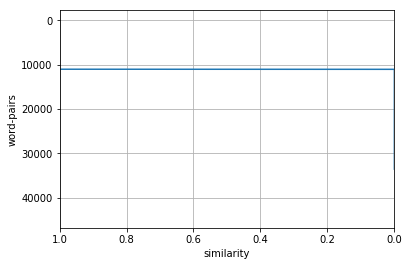

In [72]:
import matplotlib.pyplot as plt
import numpy as np

t = similarity
s = np.arange(len(similarity))
fig = plt.plot(t, s)
plt.gca().invert_yaxis()
plt.xlim(1,0)  

plt.xlabel('similarity')
plt.ylabel('word-pairs')
plt.grid(True)

plt.show()

In [73]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.models import ColumnDataSource

In [74]:
data = pd.read_csv('/Users/maitreyimokashi/Documents/Thesis/Models/cosine_similarity_075.csv')

In [75]:
df_new = data.sort_values(by ='Keys' )

In [76]:
FG = nx.from_pandas_edgelist(df_new, source='Words', target='Keys', edge_attr=True,)

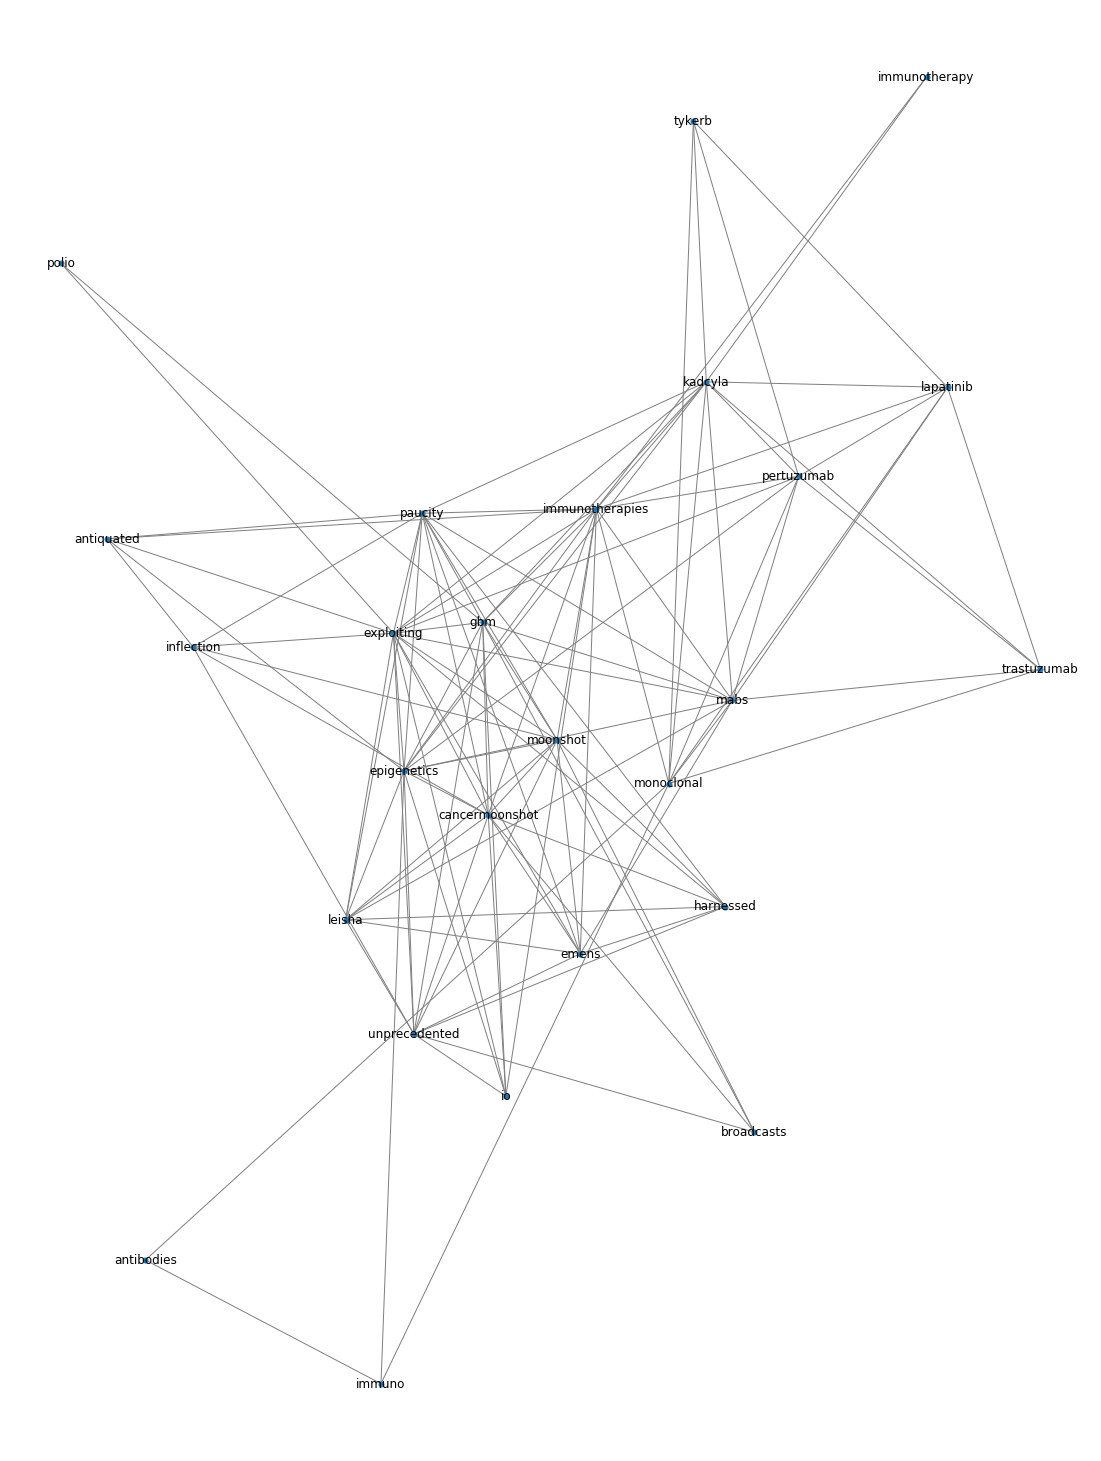

In [94]:
from math import sqrt
plt.figure(figsize=(15,20)) 
count = FG.number_of_nodes()
equilibrium = 10 / sqrt(count)    # default for this is 1/sqrt(n), but this will 'blow out' the layout for better visibility
pos = nx.fruchterman_reingold_layout(FG, k=equilibrium, iterations=100)
nx.draw(FG, pos=pos, with_labels=True,node_size=25, edge_color='gray')
plt.show()